### import librarries

In [165]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from tensorflow import keras

from skimage.transform import resize
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.utils import shuffle

In [31]:
pwd

'C:\\Users\\USER\\Documents\\Edure\\Deep Learning\\Capstone Project\\Deep learning Capstone projects\\Hurricane Damage Detection'

In [33]:
import glob

In [34]:
# traning
damage = glob.glob('train_another/damage/*.jpeg')
no_damage = glob.glob('train_another/no_damage/*.jpeg')

In [35]:
# testing
damage_test = glob.glob('test_another/damage/*.jpeg')
no_damage_test = glob.glob('test_another/no_damage/*.jpeg')

In [36]:
damage,no_damage

(['train_another/damage\\-93.55964_30.895018.jpeg',
  'train_another/damage\\-93.573763_30.693981.jpeg',
  'train_another/damage\\-93.578271_30.779923999999998.jpeg',
  'train_another/damage\\-93.59011_30.695412.jpeg',
  'train_another/damage\\-93.590598_30.694956.jpeg',
  'train_another/damage\\-93.597636_30.674362.jpeg',
  'train_another/damage\\-93.599611_30.668616999999998.jpeg',
  'train_another/damage\\-93.601916_30.793329999999997.jpeg',
  'train_another/damage\\-93.602625_30.02372.jpeg',
  'train_another/damage\\-93.604618_30.792952000000003.jpeg',
  'train_another/damage\\-93.604913_30.794565000000002.jpeg',
  'train_another/damage\\-93.605042_30.794779.jpeg',
  'train_another/damage\\-93.606053_30.799283000000003.jpeg',
  'train_another/damage\\-93.60785_30.663002000000002.jpeg',
  'train_another/damage\\-93.608532_30.661488000000002.jpeg',
  'train_another/damage\\-93.611074_30.731068.jpeg',
  'train_another/damage\\-93.611165_30.730172999999997.jpeg',
  'train_another/damag

In [37]:
damage_test,no_damage_test

(['test_another/damage\\-93.53950999999999_30.982944.jpeg',
  'test_another/damage\\-93.54819300000001_30.901116.jpeg',
  'test_another/damage\\-93.55919200000001_30.98323.jpeg',
  'test_another/damage\\-93.59406899999999_30.677996999999998.jpeg',
  'test_another/damage\\-93.59925600000001_30.668673.jpeg',
  'test_another/damage\\-93.60703000000001_30.666453000000004.jpeg',
  'test_another/damage\\-93.60805400000001_30.662183000000002.jpeg',
  'test_another/damage\\-93.61080600000001_30.666269.jpeg',
  'test_another/damage\\-93.61154599999999_30.730113.jpeg',
  'test_another/damage\\-93.61556999999999_30.731409000000003.jpeg',
  'test_another/damage\\-93.61931899999999_30.641049.jpeg',
  'test_another/damage\\-93.62290300000001_30.64392.jpeg',
  'test_another/damage\\-93.63078900000001_30.641538.jpeg',
  'test_another/damage\\-93.63359399999999_30.640924.jpeg',
  'test_another/damage\\-93.64050300000001_30.085815000000004.jpeg',
  'test_another/damage\\-93.64260999999999_30.215895.jpeg

In [38]:
#tarning
print(f'Number of damage occured: {len(damage)}')
print(f'Number of No damage occured: {len(no_damage)}')


Number of damage occured: 484
Number of No damage occured: 483


In [39]:
#testing
print(f'Number of damage occured: {len(damage_test)}')
print(f'Number of No damage occured: {len(no_damage_test)}')

Number of damage occured: 429
Number of No damage occured: 329


In [51]:
#tarning
image = []
label = []
for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in no_damage:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

In [53]:
image,label = shuffle(image,label,random_state=100)

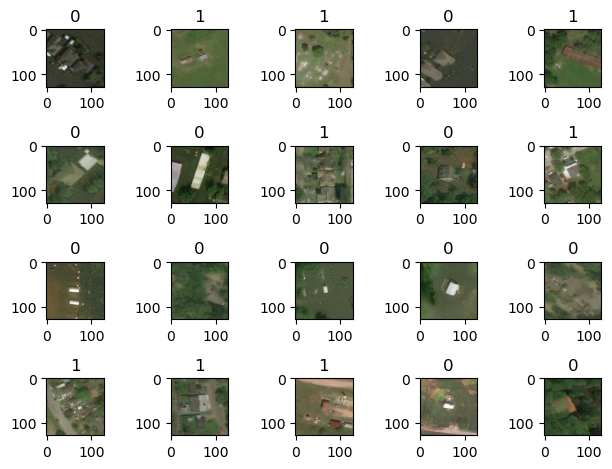

In [55]:

# plot this
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    plt.title(label[i])

plt.tight_layout()


In [69]:
#testing
image_test = []
label_test = []
for i in damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in no_damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [73]:
image_test,label_test = shuffle(image_test,label_test,random_state=100)

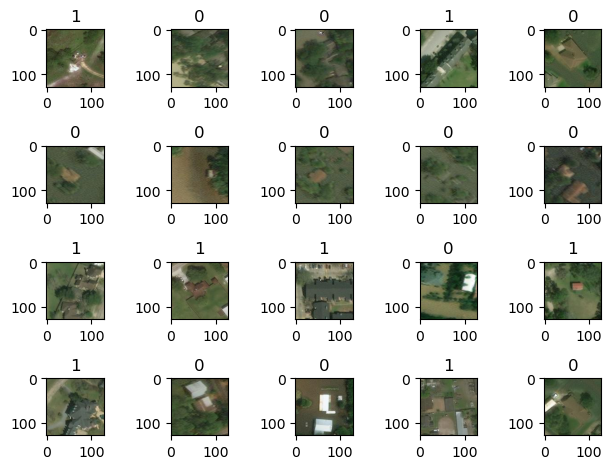

In [75]:
#plot this
for i in range (20):
    plt.subplot(4,5,i+1)
    plt.imshow(image_test[i])
    plt.title(label_test[i])

plt.tight_layout()


### Reshape the train and test

In [87]:
# training
xtrain = []
for i in image:
    xtrain.append(resize(i,(64,64,3)))


In [88]:
# test
xtest = []
for i in image_test:
    xtest.append(resize(i,(64,64,3)))

In [91]:
# make it in array format
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(label)
ytest = np.array(label_test)

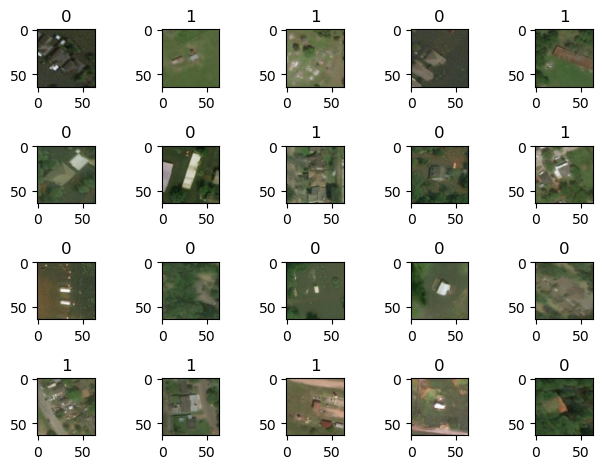

In [93]:
# plot some of reshaped image
for i in range (20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtrain[i])
    plt.title(ytrain[i])

plt.tight_layout()

In [125]:
# check shape of training and testing set
print(f'Shape of xtrain is:',xtrain.shape)
print(f'Shape of xtest is:', xtest.shape)
print(f'Shape of ytrain is:',ytrain.shape)
print(f'Shape of ytest is:',ytest.shape)

Shape of xtrain is: (967, 64, 64, 3)
Shape of xtest is: (758, 64, 64, 3)
Shape of ytrain is: (967,)
Shape of ytest is: (758,)


### create a model

In [137]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (64,64,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
# compile the model
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [141]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### train the model

In [144]:
model.fit(xtrain,ytrain,epochs = 15,validation_split = 0.2)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5334 - loss: 0.6934 - val_accuracy: 0.6289 - val_loss: 0.5854
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7478 - loss: 0.5310 - val_accuracy: 0.6753 - val_loss: 0.5822
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7581 - loss: 0.5036 - val_accuracy: 0.7938 - val_loss: 0.4102
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8411 - loss: 0.3866 - val_accuracy: 0.8402 - val_loss: 0.3878
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8457 - loss: 0.3869 - val_accuracy: 0.7216 - val_loss: 0.5330
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7922 - loss: 0.4730 - val_accuracy: 0.8402 - val_loss: 0.3708
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8509 - loss: 0.3512 - val_accuracy: 0.8196 - val_loss: 0.3881
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8622 - loss: 0.3430 - val_accuracy: 0.8660 - v

In [146]:
model.evaluate(xtrain,ytrain)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8102 - loss: 0.4075


[0.4212070405483246, 0.8107548952102661]

In [150]:
prediction = model.predict(xtest)
prediction[0]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([0.9955642], dtype=float32)

In [152]:
pred = []
for i in prediction:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [158]:
pred[:10]

[1, 1, 1, 1, 0, 0, 1, 0, 1, 0]

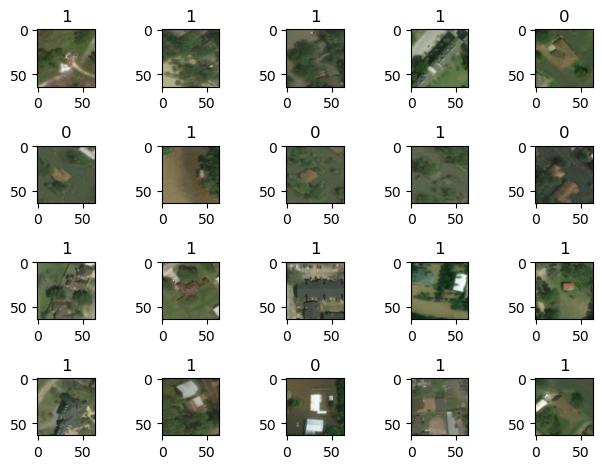

In [162]:
#plot this
for i in range (20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i])
    plt.title(pred[i])

plt.tight_layout()

### make visualization

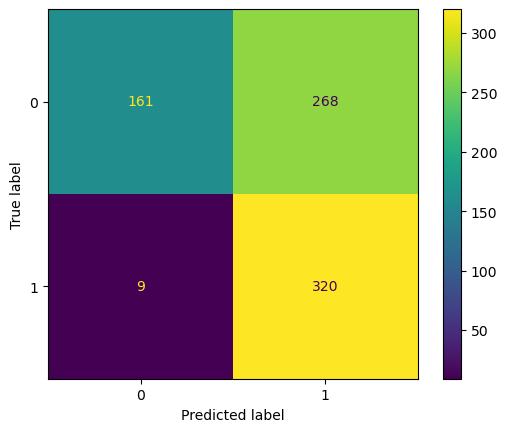

In [167]:
ConfusionMatrixDisplay.from_predictions(ytest,pred)